In [8]:
import stock_analysis
#import dependencies 
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#stock analysis virtual environment, attributed by Stefanie Molin and licensed by MIT creative common
import stock_analysis
reader = stock_analysis.StockReader('2010-06-01', '2018-01-01')

# get stock data
pmt, o, vti = (
    reader.get_ticker_data(ticker) \
    for ticker in ['o', 'pmt', 'vti'])

# get NASDAQ data
nye = reader.get_index_data('NASDAQ')

In [9]:
stocks_nasdaq = group_stocks(
    {'Pennymac Mortgage Trust':pmt,
     'Realty Income Corp': o,
    'VTI' : vti
    }
)

In [12]:
all_assets_analyzer = stock_analysis.AssetGroupAnalyzer(
    stocks_nasdaq
)

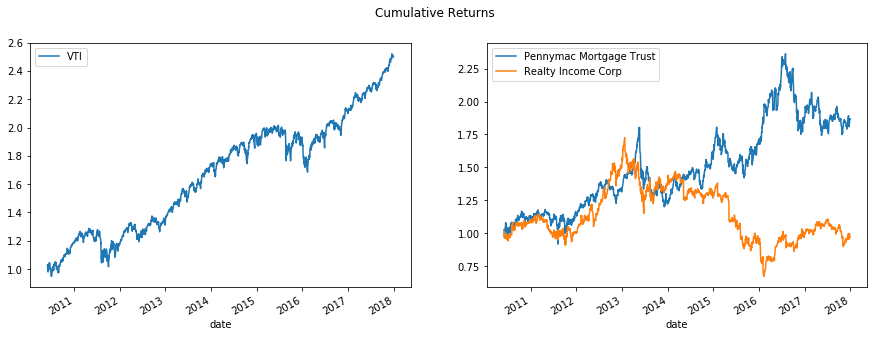

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
cumulative_returns = all_assets_analyzer.analyze(
    'cumulative_returns'
)
for name, data in cumulative_returns.items():
    data.plot(
        ax=axes[0] if name == 'VTI' else axes[1], 
        label=name,
        legend=True
    )
plt.suptitle('Cumulative Returns')
plt.savefig("Question5.png")